In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


def genTestData(npoints, max):
    rng = np.random.RandomState(1)
    return max * rng.rand(npoints)


def genPointsFromGroundTruthEquationWithNoise(npoints, maxX, noise=0):
    xPointsList = genTestData(npoints, maxX)
    print(npoints, max)

    rng = np.random.RandomState(9)
    points = []
    for x in xPointsList:
        y = (rng.rand() * noise) + np.sin(x) + x
        points.append((x,y))
    return points

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


def genTesting(i):
    trainingPoints = genPointsFromGroundTruthEquationWithNoise(i, 30, noise=4.0)
    x = [x for x, y in trainingPoints]
    y = [y for x, y in trainingPoints]
    plt.scatter(x, y, s=15, color='black')

    y_all = np.array(y)
    x_all = np.array(x)

    size = len(x)

    train_size = int(size*0.8)
    test_size = int(size*0.2)

    x_train = x_all[:train_size]
    x_test = x_all[test_size:]

    y_train = y_all[:train_size]
    y_test = y_all[test_size:]
    return x_train, x_test, y_train, y_test

<p>1000 points with 3 features seems to have the best MSE with only changing the number of points and the number of features as 1.658 against the test, and 4.408 against the ground data. </p>
<b>Now testing regularization</b>

500 <built-in function max>
1000 <built-in function max>
5000 <built-in function max>
10000 <built-in function max>
Features =  0 , regularization =  regular , standarization =  True , MSE against test w/ noise 74.45296580258
MSE against ground 77.6562409311669
500 <built-in function max>
1000 <built-in function max>
5000 <built-in function max>
10000 <built-in function max>
Features =  1 , regularization =  regular , standarization =  True , MSE against test w/ noise 1.796221518110032
MSE against ground 4.4720542297511345
500 <built-in function max>
1000 <built-in function max>
5000 <built-in function max>
10000 <built-in function max>
Features =  2 , regularization =  regular , standarization =  True , MSE against test w/ noise 1.7922260492126456
MSE against ground 4.468580597329669
500 <built-in function max>
1000 <built-in function max>
5000 <built-in function max>
10000 <built-in function max>
Features =  3 , regularization =  regular , standarization =  True , MSE against test w/

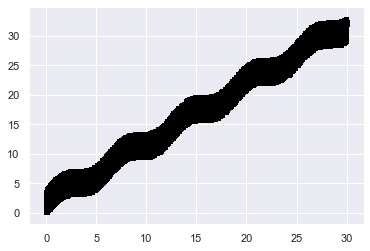

In [16]:
mse_values = []
mse_data = []
for j in ["regular", "lasso", "ridge"]:
    for k in [True, False]:
        for i in range(5):
            for ii in [500,1000,5000,10000]:
                x_train, x_test, y_train, y_test = genTesting(ii)
            if not k:
                if j=="regular":
                    poly_model = make_pipeline(PolynomialFeatures(i), LinearRegression())
                if j=="lasso":
                    a = 1 * 10**(i)
                    poly_model = make_pipeline(PolynomialFeatures(i), Lasso(alpha=a))
                if j=="ridge":
                    a = 1 * 10**(i)
                    poly_model = make_pipeline(PolynomialFeatures(i), Ridge(alpha=a))
            elif k:
                if j=="regular":
                    poly_model = make_pipeline(StandardScaler(), PolynomialFeatures(i), LinearRegression())
                if j=="lasso":
                    a = 1 * 10**(i)
                    poly_model = make_pipeline(StandardScaler(), PolynomialFeatures(i), Lasso(alpha=a))
                if j=="ridge":
                    a = 1 * 10**(i)
                    poly_model = make_pipeline(StandardScaler(), PolynomialFeatures(i), Ridge(alpha=a))
            poly_model.fit(x_train[:, np.newaxis], y_train)
            xfit = np.linspace(0,30,100)
            yfit = poly_model.predict(xfit[:, np.newaxis])
            y_predict = poly_model.predict(x_test[:,np.newaxis])
            print("Features = ", i, ", regularization = ", j, ", standarization = ", k, ", MSE against test w/ noise", mean_squared_error(y_predict, y_test))
            y_ground = [np.sin(x)+x for x in x_test]
            print("MSE against ground", mean_squared_error(y_predict, y_ground))
            mse_values.append(mean_squared_error(y_predict, y_ground))
            mse_data.append((i, j, k, ii))

Features =  0 , Standardization =  True , Regularization =  regular , values =  10000 , mse against ground =  77.6562409311669
Features =  1 , Standardization =  True , Regularization =  regular , values =  10000 , mse against ground =  4.4720542297511345
Features =  2 , Standardization =  True , Regularization =  regular , values =  10000 , mse against ground =  4.468580597329669
Features =  3 , Standardization =  True , Regularization =  regular , values =  10000 , mse against ground =  4.450201319508428
Features =  4 , Standardization =  True , Regularization =  regular , values =  10000 , mse against ground =  4.450261521850174
Features =  0 , Standardization =  False , Regularization =  regular , values =  10000 , mse against ground =  77.6562409311669
Features =  1 , Standardization =  False , Regularization =  regular , values =  10000 , mse against ground =  4.4720542297509835
Features =  2 , Standardization =  False , Regularization =  regular , values =  10000 , mse against g

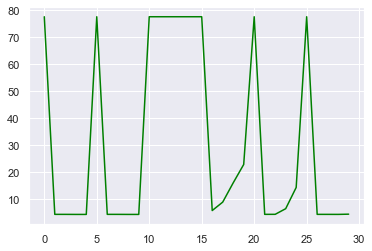

In [17]:
list_vals = list(range(len(mse_values)))
plt.plot(list_vals, mse_values, color='green')
count = 0
for i, j, k, ii in mse_data:
    print("Features = ", i, ", Standardization = ", k, ", Regularization = ", j, ", values = ", ii, ", mse against ground = ", mse_values[count])
    count += 1
print("Minimum mse = ", min(mse_values))
print("Minimum value is found at ", mse_data[np.argmin(mse_values)])

### Conclusions
As we can see above, the lowest mse against the ground truth is best with 3 polynomial features, no lasso or ridge regression, no standardization, and 10000 values.